In [1]:
import torch
import torch.nn as nn

# Vision Transformer for CIFAR-10
class VisionTransformer(nn.Module):
    def __init__(self, num_classes=10, num_blocks=6, num_heads=6, embed_dim=384, patch_size=16, image_size=224, dropout_rate=0.3):
        super(VisionTransformer, self).__init__()
        
        self.num_patches = (image_size // patch_size) ** 2
        self.patch_embed = nn.Conv2d(3, embed_dim, kernel_size=patch_size, stride=patch_size)
        self.pos_embedding = nn.Parameter(torch.randn(1, self.num_patches, embed_dim))
        self.transformer_blocks = nn.Sequential(
            *[nn.TransformerEncoderLayer(
                d_model=embed_dim, nhead=num_heads, dropout=dropout_rate
            ) for _ in range(num_blocks)]
        )
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(embed_dim, num_classes)
    
    def forward(self, x):
        x = self.patch_embed(x)
        x = x.flatten(2).transpose(1, 2)
        x = x + self.pos_embedding
        x = self.transformer_blocks(x)
        x = x.mean(dim=1)
        x = self.fc(self.dropout(x))
        return x

# Initialize the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VisionTransformer(
    num_classes=10,
    num_blocks=6,
    num_heads=6,
    embed_dim=384,
    patch_size=16,
    image_size=224,
    dropout_rate=0.3,
).to(device)

# Multi-GPU Support
if torch.cuda.device_count() > 1:
    print(f"Using {torch.cuda.device_count()} GPUs!")
    model = nn.DataParallel(model)


Using 2 GPUs!


In [2]:
from torchvision import transforms, datasets
from torchvision.transforms import RandAugment
from torch.utils.data import DataLoader, random_split
import random

# Data Augmentation for Training with RandAugment
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    RandAugment(num_ops=2, magnitude=9),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.2), ratio=(0.3, 3.3)),
])

# Validation Transform
val_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

# Load CIFAR-10 Dataset
train_set = datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)
test_set = datasets.CIFAR10(root='./data', train=False, download=True, transform=val_transform)

# Split Train Set for Validation
train_size = int(0.8 * len(train_set))
val_size = len(train_set) - train_size
train_set, val_set = random_split(train_set, [train_size, val_size])

# Data Loaders
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
val_loader = DataLoader(val_set, batch_size=64, shuffle=False)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

print("Data loaders ready!")


100%|██████████| 170498071/170498071 [00:08<00:00, 20701470.33it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Data loaders ready!


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Epoch [1/30] - Train Accuracy: 0.1569 - Train Loss: 2.2380 - Val Accuracy: 0.2017 - Val Loss: 2.1062 - F1-Score: 0.1535 - Learning Rate: 0.000120 - Memory: 1813.32MB - Epoch Time: 282.71s


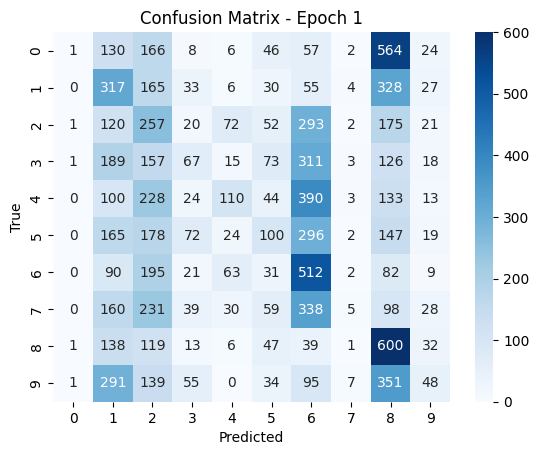

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Epoch [2/30] - Train Accuracy: 0.1825 - Train Loss: 2.1828 - Val Accuracy: 0.2197 - Val Loss: 2.0509 - F1-Score: 0.1824 - Learning Rate: 0.000180 - Memory: 1822.09MB - Epoch Time: 283.81s


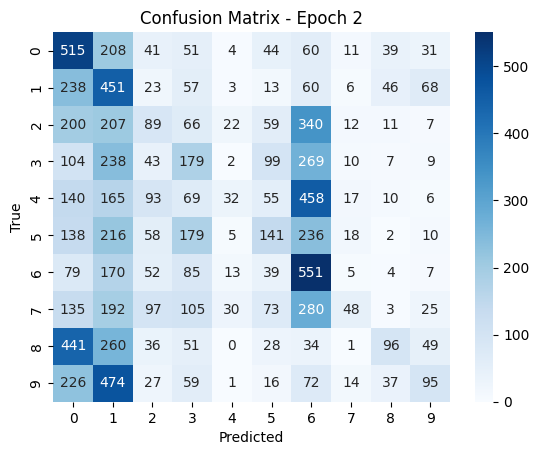

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Epoch [3/30] - Train Accuracy: 0.1983 - Train Loss: 2.1519 - Val Accuracy: 0.2246 - Val Loss: 2.0612 - F1-Score: 0.1911 - Learning Rate: 0.000240 - Memory: 1823.22MB - Epoch Time: 283.86s


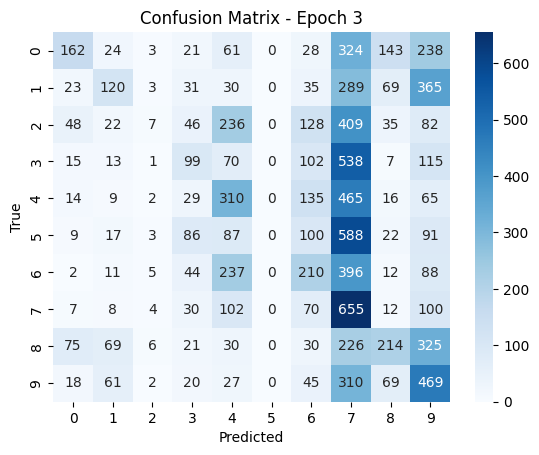

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Epoch [4/30] - Train Accuracy: 0.2051 - Train Loss: 2.1367 - Val Accuracy: 0.2538 - Val Loss: 1.9993 - F1-Score: 0.2339 - Learning Rate: 0.000300 - Memory: 1826.23MB - Epoch Time: 284.11s


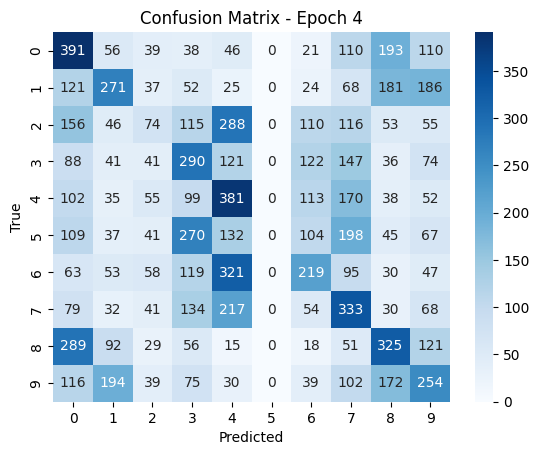

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Epoch [5/30] - Train Accuracy: 0.2105 - Train Loss: 2.1298 - Val Accuracy: 0.2486 - Val Loss: 2.0145 - F1-Score: 0.2188 - Learning Rate: 0.000300 - Memory: 1826.27MB - Epoch Time: 285.22s


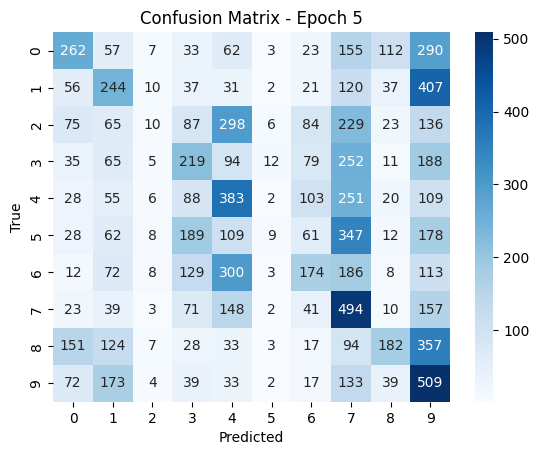

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Epoch [6/30] - Train Accuracy: 0.2134 - Train Loss: 2.1238 - Val Accuracy: 0.2633 - Val Loss: 1.9924 - F1-Score: 0.2406 - Learning Rate: 0.000299 - Memory: 1826.41MB - Epoch Time: 286.32s


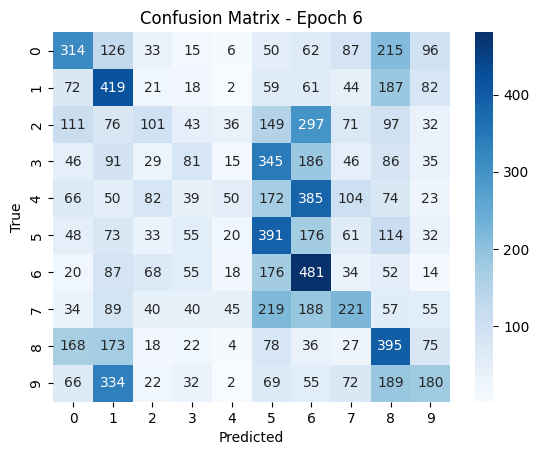

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Epoch [7/30] - Train Accuracy: 0.2162 - Train Loss: 2.1139 - Val Accuracy: 0.2702 - Val Loss: 1.9778 - F1-Score: 0.2560 - Learning Rate: 0.000295 - Memory: 1826.42MB - Epoch Time: 285.50s


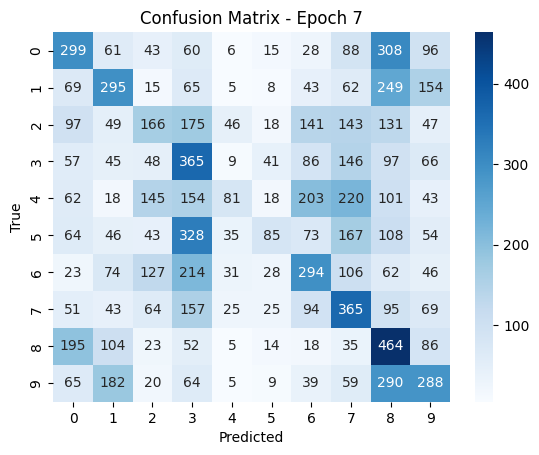

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Epoch [8/30] - Train Accuracy: 0.2266 - Train Loss: 2.1098 - Val Accuracy: 0.2672 - Val Loss: 1.9752 - F1-Score: 0.2450 - Learning Rate: 0.000289 - Memory: 1826.48MB - Epoch Time: 282.96s


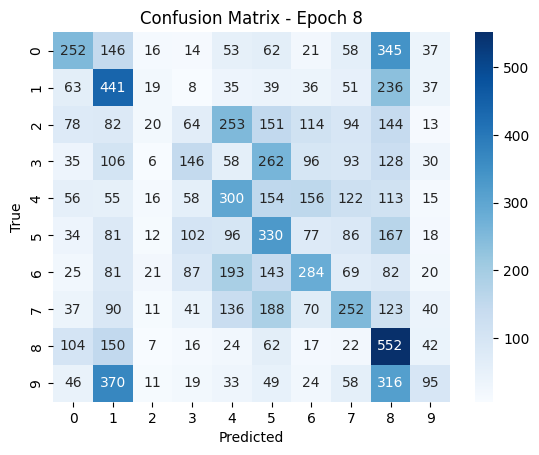

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Epoch [9/30] - Train Accuracy: 0.2297 - Train Loss: 2.0998 - Val Accuracy: 0.2815 - Val Loss: 1.9664 - F1-Score: 0.2633 - Learning Rate: 0.000281 - Memory: 1826.95MB - Epoch Time: 283.58s


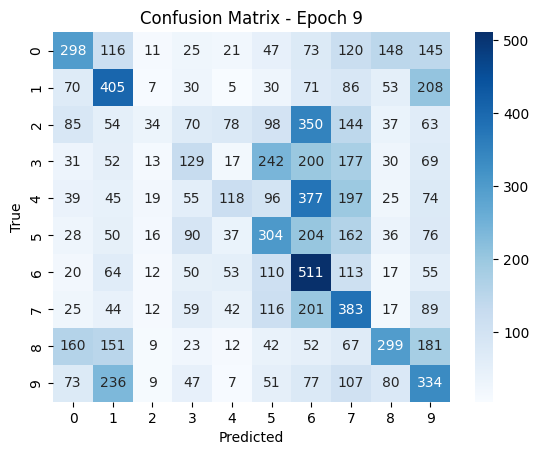

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Epoch [10/30] - Train Accuracy: 0.2329 - Train Loss: 2.0942 - Val Accuracy: 0.2638 - Val Loss: 1.9727 - F1-Score: 0.2409 - Learning Rate: 0.000271 - Memory: 1826.95MB - Epoch Time: 281.42s


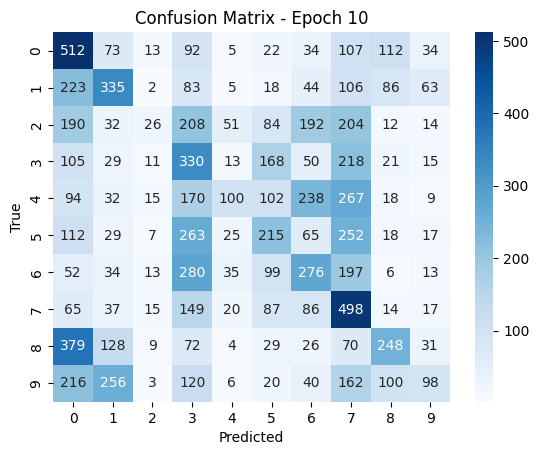

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Epoch [11/30] - Train Accuracy: 0.2392 - Train Loss: 2.0769 - Val Accuracy: 0.2956 - Val Loss: 1.9231 - F1-Score: 0.2670 - Learning Rate: 0.000259 - Memory: 1827.07MB - Epoch Time: 281.70s


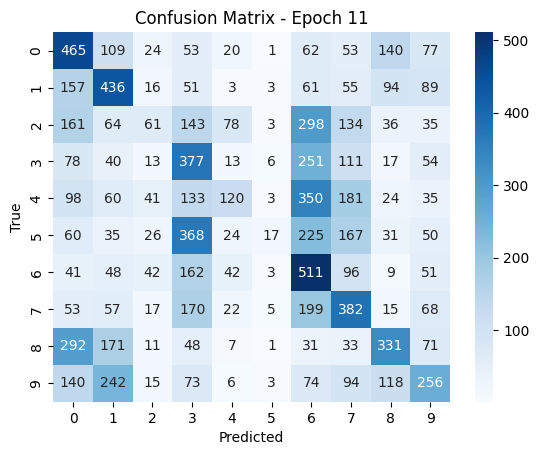

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Epoch [12/30] - Train Accuracy: 0.2528 - Train Loss: 2.0565 - Val Accuracy: 0.3002 - Val Loss: 1.9006 - F1-Score: 0.2910 - Learning Rate: 0.000246 - Memory: 1827.08MB - Epoch Time: 280.91s


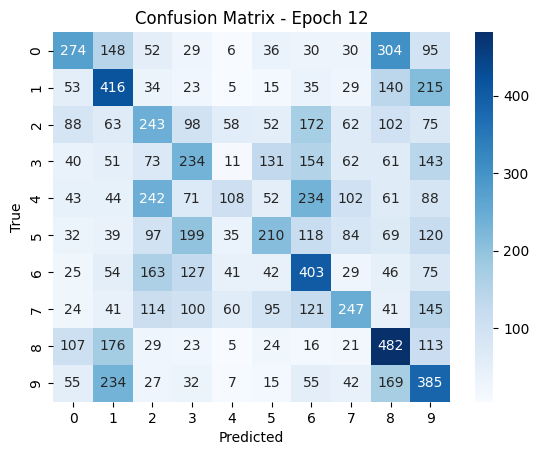

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Epoch [13/30] - Train Accuracy: 0.2557 - Train Loss: 2.0547 - Val Accuracy: 0.3130 - Val Loss: 1.8788 - F1-Score: 0.3023 - Learning Rate: 0.000230 - Memory: 1827.09MB - Epoch Time: 281.65s


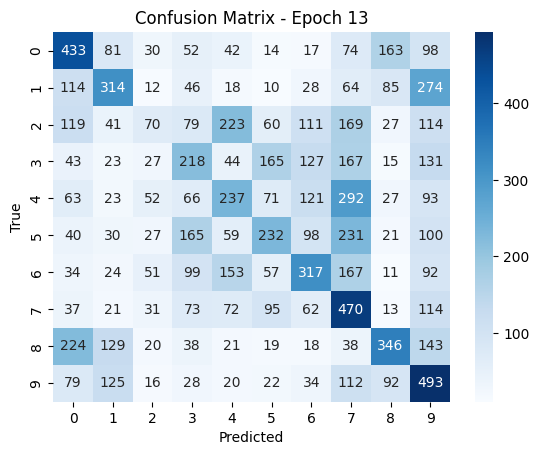

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Epoch [14/30] - Train Accuracy: 0.2644 - Train Loss: 2.0363 - Val Accuracy: 0.3282 - Val Loss: 1.8579 - F1-Score: 0.3215 - Learning Rate: 0.000214 - Memory: 1827.95MB - Epoch Time: 281.93s


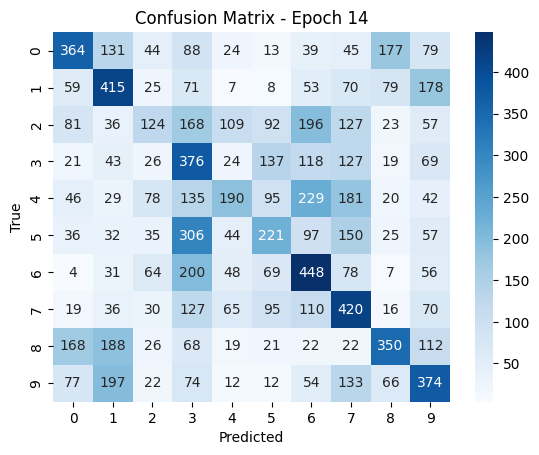

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Epoch [15/30] - Train Accuracy: 0.2788 - Train Loss: 2.0067 - Val Accuracy: 0.3469 - Val Loss: 1.8192 - F1-Score: 0.3317 - Learning Rate: 0.000196 - Memory: 1827.95MB - Epoch Time: 282.64s


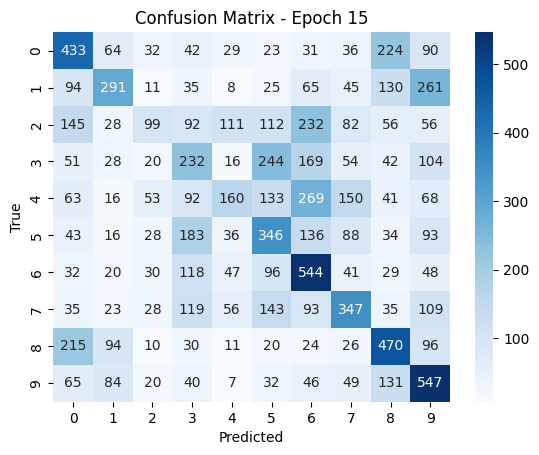

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Epoch [16/30] - Train Accuracy: 0.2855 - Train Loss: 1.9906 - Val Accuracy: 0.3449 - Val Loss: 1.8238 - F1-Score: 0.3368 - Learning Rate: 0.000178 - Memory: 1827.95MB - Epoch Time: 282.00s


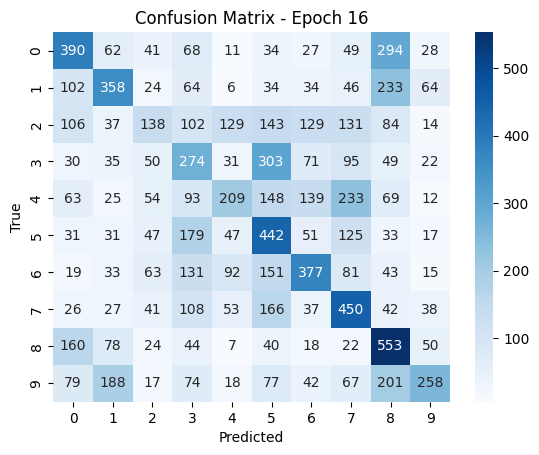

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Epoch [17/30] - Train Accuracy: 0.2881 - Train Loss: 1.9830 - Val Accuracy: 0.3542 - Val Loss: 1.7822 - F1-Score: 0.3371 - Learning Rate: 0.000159 - Memory: 1828.28MB - Epoch Time: 281.33s


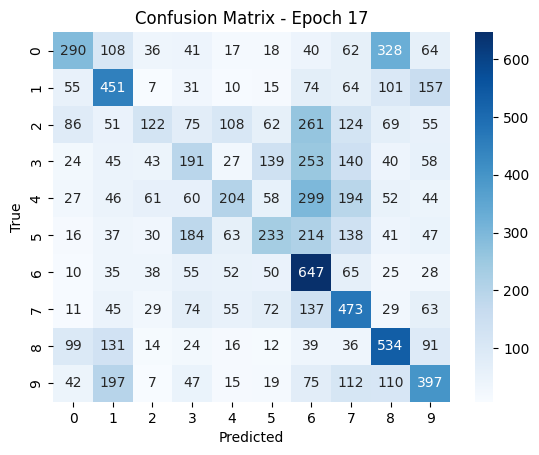

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Epoch [18/30] - Train Accuracy: 0.2973 - Train Loss: 1.9682 - Val Accuracy: 0.3595 - Val Loss: 1.7794 - F1-Score: 0.3469 - Learning Rate: 0.000141 - Memory: 1828.28MB - Epoch Time: 280.37s


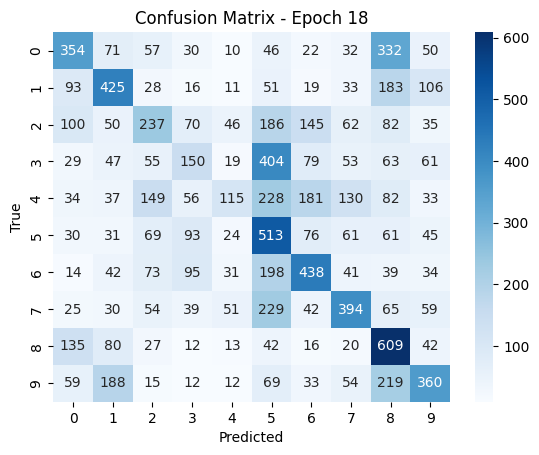

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Epoch [19/30] - Train Accuracy: 0.2997 - Train Loss: 1.9646 - Val Accuracy: 0.3669 - Val Loss: 1.7658 - F1-Score: 0.3535 - Learning Rate: 0.000122 - Memory: 1828.52MB - Epoch Time: 281.39s


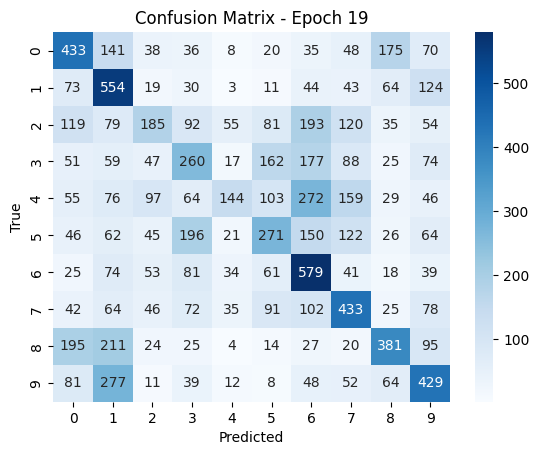

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Epoch [20/30] - Train Accuracy: 0.3063 - Train Loss: 1.9569 - Val Accuracy: 0.3669 - Val Loss: 1.7593 - F1-Score: 0.3542 - Learning Rate: 0.000104 - Memory: 1828.52MB - Epoch Time: 280.89s


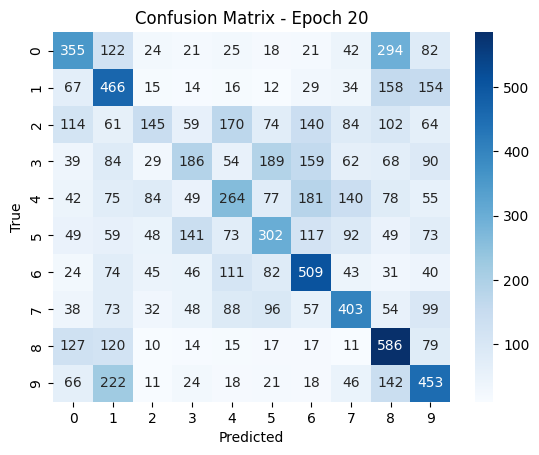

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Epoch [21/30] - Train Accuracy: 0.3128 - Train Loss: 1.9426 - Val Accuracy: 0.3769 - Val Loss: 1.7451 - F1-Score: 0.3647 - Learning Rate: 0.000086 - Memory: 1828.52MB - Epoch Time: 281.06s


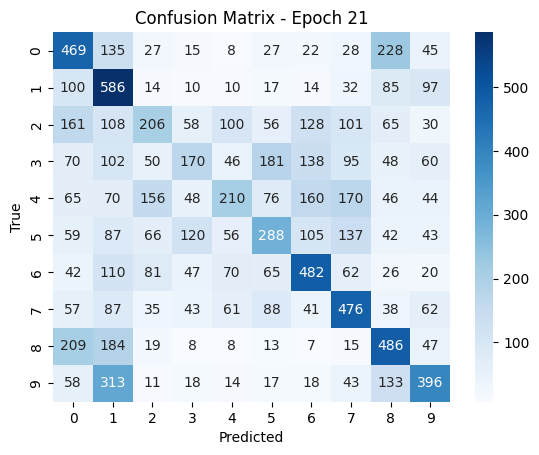

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Epoch [22/30] - Train Accuracy: 0.3149 - Train Loss: 1.9362 - Val Accuracy: 0.3864 - Val Loss: 1.7287 - F1-Score: 0.3729 - Learning Rate: 0.000070 - Memory: 1828.80MB - Epoch Time: 286.05s


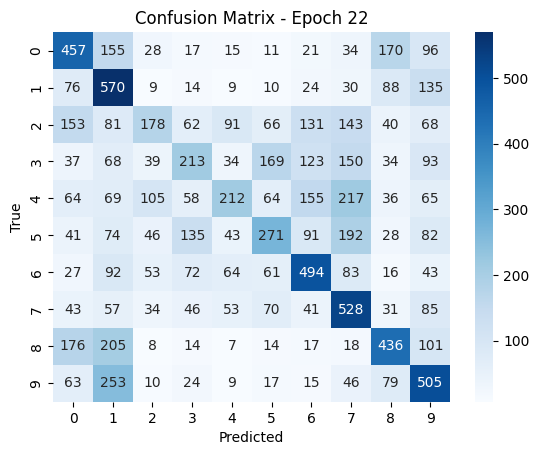

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Epoch [23/30] - Train Accuracy: 0.3127 - Train Loss: 1.9460 - Val Accuracy: 0.3925 - Val Loss: 1.6996 - F1-Score: 0.3875 - Learning Rate: 0.000054 - Memory: 1828.80MB - Epoch Time: 287.47s


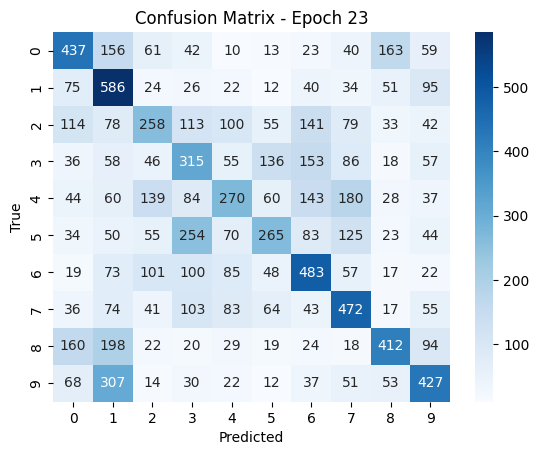

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Epoch [24/30] - Train Accuracy: 0.3170 - Train Loss: 1.9309 - Val Accuracy: 0.3924 - Val Loss: 1.7113 - F1-Score: 0.3831 - Learning Rate: 0.000041 - Memory: 1828.92MB - Epoch Time: 288.63s


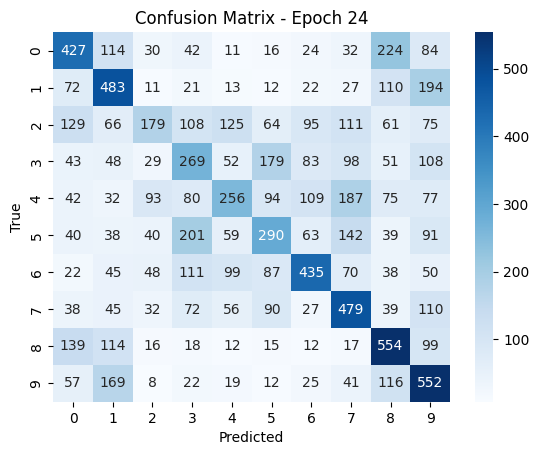

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Epoch [25/30] - Train Accuracy: 0.3224 - Train Loss: 1.9237 - Val Accuracy: 0.3955 - Val Loss: 1.6938 - F1-Score: 0.3821 - Learning Rate: 0.000029 - Memory: 1828.92MB - Epoch Time: 284.67s


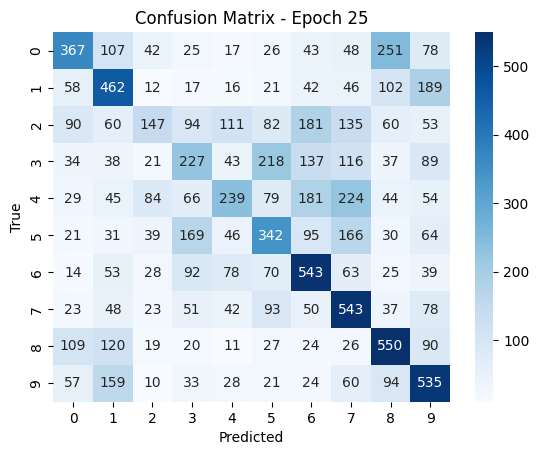

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Epoch [26/30] - Train Accuracy: 0.3310 - Train Loss: 1.9015 - Val Accuracy: 0.4005 - Val Loss: 1.6833 - F1-Score: 0.3900 - Learning Rate: 0.000019 - Memory: 1828.92MB - Epoch Time: 282.95s


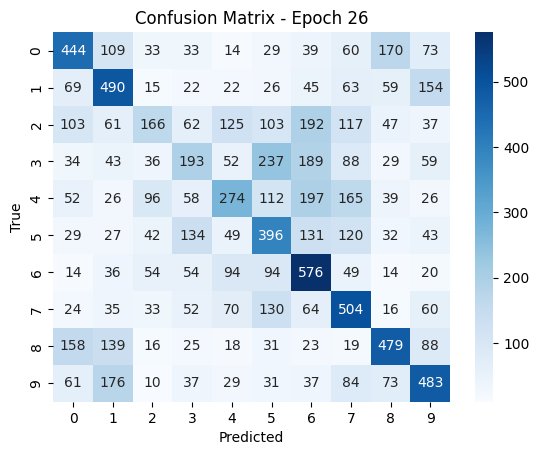

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Epoch [27/30] - Train Accuracy: 0.3356 - Train Loss: 1.8895 - Val Accuracy: 0.4098 - Val Loss: 1.6640 - F1-Score: 0.4017 - Learning Rate: 0.000011 - Memory: 1829.53MB - Epoch Time: 282.67s


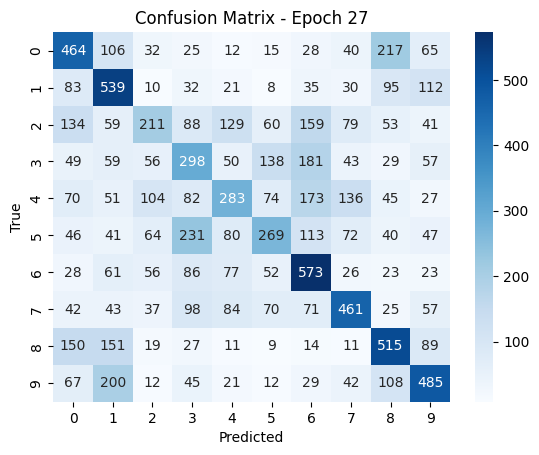

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Epoch [28/30] - Train Accuracy: 0.3358 - Train Loss: 1.8952 - Val Accuracy: 0.4139 - Val Loss: 1.6541 - F1-Score: 0.4034 - Learning Rate: 0.000005 - Memory: 1829.53MB - Epoch Time: 280.94s


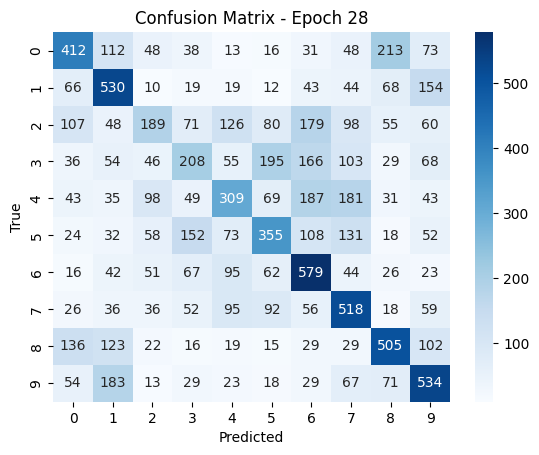

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Epoch [29/30] - Train Accuracy: 0.3290 - Train Loss: 1.9054 - Val Accuracy: 0.4104 - Val Loss: 1.6542 - F1-Score: 0.4019 - Learning Rate: 0.000001 - Memory: 1829.53MB - Epoch Time: 282.35s


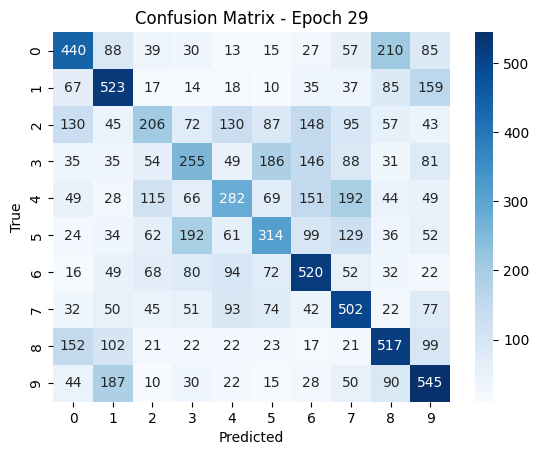

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


Epoch [30/30] - Train Accuracy: 0.3280 - Train Loss: 1.9060 - Val Accuracy: 0.4158 - Val Loss: 1.6604 - F1-Score: 0.4070 - Learning Rate: 0.000000 - Memory: 1829.53MB - Epoch Time: 286.38s


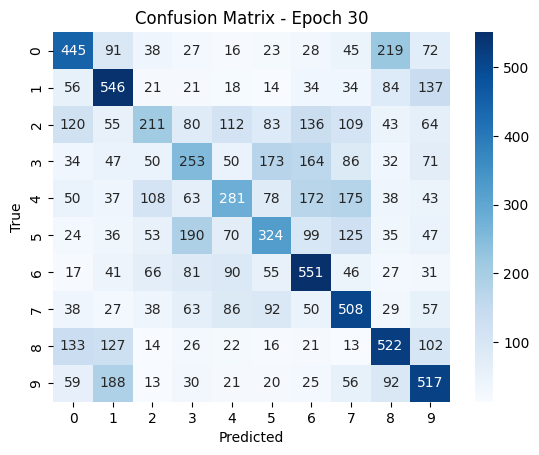

Total Training Time: 8516.71s


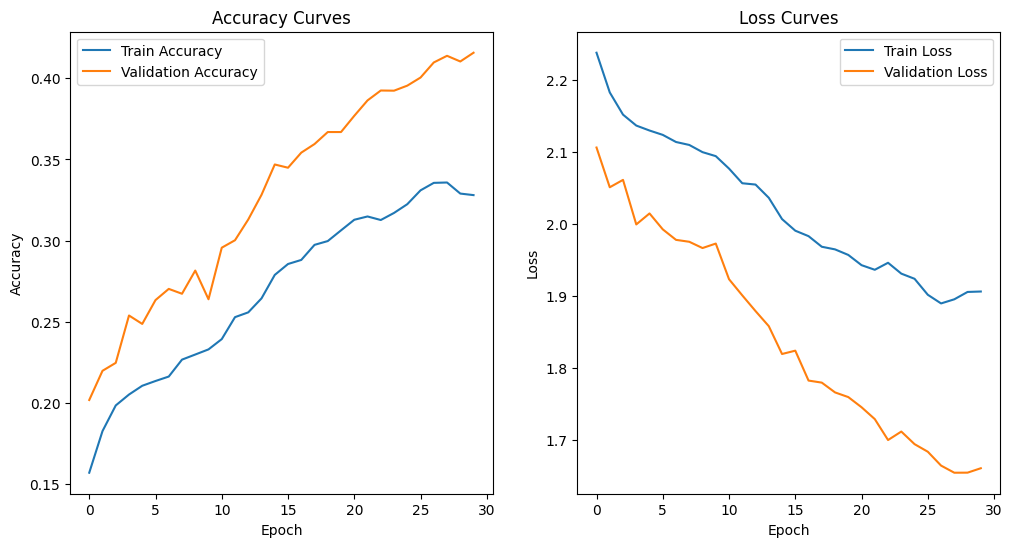

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import LambdaLR
import numpy as np
import time
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import psutil
import os
import random

# Optimizer, Scheduler, and Loss Function
base_lr = 3e-4  # Base learning rate
warmup_epochs = 5  # Number of warmup epochs
num_epochs = 30  # Total training epochs

optimizer = optim.AdamW(model.parameters(), lr=base_lr, weight_decay=0.1)
criterion = nn.CrossEntropyLoss()

# Lambda function for learning rate schedule (Warmup + Cosine Annealing)
def lr_lambda(epoch):
    if epoch < warmup_epochs:
        return (epoch + 1) / warmup_epochs  # Linear warmup
    else:
        cosine_epochs = num_epochs - warmup_epochs
        return 0.5 * (1 + np.cos((epoch - warmup_epochs) / cosine_epochs * np.pi))  # Cosine annealing

scheduler = LambdaLR(optimizer, lr_lambda=lr_lambda)

# MixUp Implementation
def mixup_data(x, y, alpha=1.0):
    if alpha > 0.0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1.0
    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(x.device)
    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

# CutMix Implementation
def cutmix_data(x, y, alpha=1.0):
    lam = np.random.beta(alpha, alpha)
    batch_size, _, H, W = x.size()
    index = torch.randperm(batch_size).to(x.device)
    cx = random.randint(0, W)
    cy = random.randint(0, H)
    w = int(W * lam ** 0.5)
    h = int(H * lam ** 0.5)
    x1 = max(cx - w // 2, 0)
    x2 = min(cx + w // 2, W)
    y1 = max(cy - h // 2, 0)
    y2 = min(cy + h // 2, H)
    
    mixed_x = x.clone()
    mixed_x[:, :, y1:y2, x1:x2] = x[index, :, y1:y2, x1:x2]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

# Training Loop
best_val_accuracy = 0
process = psutil.Process(os.getpid())
train_accuracies, val_accuracies = [], []
train_losses, val_losses = [], []

start_training_time = time.time()  # Track overall training time

for epoch in range(num_epochs):
    model.train()
    epoch_start_time = time.time()
    train_loss, train_correct, train_total = 0, 0, 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        # Apply MixUp or CutMix randomly
        if random.random() < 0.5:
            if random.random() < 0.5:
                images, y_a, y_b, lam = mixup_data(images, labels)
            else:
                images, y_a, y_b, lam = cutmix_data(images, labels)
        else:
            lam = 1.0
            y_a, y_b = labels, labels
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = lam * criterion(outputs, y_a) + (1 - lam) * criterion(outputs, y_b)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * images.size(0)
        _, preds = outputs.max(1)
        train_correct += (lam * preds.eq(y_a).sum().item() + (1 - lam) * preds.eq(y_b).sum().item())
        train_total += labels.size(0)
    
    scheduler.step()  # Update learning rate
    train_accuracy = train_correct / train_total
    train_accuracies.append(train_accuracy)
    train_losses.append(train_loss / train_total)

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0
    val_preds, val_labels = [], []
    
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
            _, preds = outputs.max(1)
            val_correct += preds.eq(labels).sum().item()
            val_total += labels.size(0)
            val_preds.extend(preds.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())
    
    val_accuracy = val_correct / val_total
    val_accuracies.append(val_accuracy)
    val_losses.append(val_loss / val_total)
    
    # Metrics
    precision, recall, f1, _ = precision_recall_fscore_support(val_labels, val_preds, average="macro", zero_division=1)
    cm = confusion_matrix(val_labels, val_preds)
    memory_usage = process.memory_info().rss / (1024 ** 2)
    epoch_time = time.time() - epoch_start_time  # Time for this epoch
    
    # Log Epoch Metrics
    current_lr = scheduler.get_last_lr()[0]
    print(f"Epoch [{epoch + 1}/{num_epochs}] - Train Accuracy: {train_accuracy:.4f} - Train Loss: {train_loss / train_total:.4f} - "
          f"Val Accuracy: {val_accuracy:.4f} - Val Loss: {val_loss / val_total:.4f} - F1-Score: {f1:.4f} - "
          f"Learning Rate: {current_lr:.6f} - Memory: {memory_usage:.2f}MB - Epoch Time: {epoch_time:.2f}s")
    
    # Save best model
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        torch.save(model, "best_vit_model.pth")  # Save the entire model

    # Save metrics to log file
    with open("metrics_log.txt", "a") as f:
        f.write(f"Epoch {epoch + 1}: Train Accuracy: {train_accuracy:.4f}, Train Loss: {train_loss / train_total:.4f}, "
                f"Val Accuracy: {val_accuracy:.4f}, Val Loss: {val_loss / val_total:.4f}, Precision: {precision:.4f}, "
                f"Recall: {recall:.4f}, F1: {f1:.4f}, Learning Rate: {current_lr:.6f}, Epoch Time: {epoch_time:.2f}s, "
                f"Memory Usage: {memory_usage:.2f}MB\n")

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - Epoch {epoch + 1}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Training Time
total_training_time = time.time() - start_training_time
print(f"Total Training Time: {total_training_time:.2f}s")

# Plot training and validation metrics
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), train_accuracies, label="Train Accuracy")
plt.plot(range(num_epochs), val_accuracies, label="Validation Accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Curves")

plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), train_losses, label="Train Loss")
plt.plot(range(num_epochs), val_losses, label="Validation Loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curves")
plt.show()
